# 相关模块导入

In [138]:
from IPython.core.interactiveshell import InteractiveShell

import copy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy import stats
%matplotlib inline

InteractiveShell.ast_node_interactivity = "all"  # 一个cell显示多输出

pd.set_option('display.max_rows', 100)  # 设置最大显示100行
pd.set_option('display.max_columns', 100)  # 设置最大显示100列

# 数据读取与总览

In [139]:
raw_data = pd.read_csv('data/train/train.csv')

In [140]:
raw_data.head()

,id_num,program_type,program_id,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,9389_150,Y,Y_1,136.0,150.0,offline,intermediate,9389.0,M,Matriculation,3.0,24.0,5.0,N,1.0,0
1,16523_44,T,T_1,131.0,44.0,offline,easy,16523.0,F,High School Diploma,4.0,26.0,2.0,N,3.0,1
2,13987_178,Z,Z_2,120.0,178.0,online,easy,13987.0,M,Matriculation,1.0,40.0,1.0,N,2.0,1
3,13158_32,T,T_2,117.0,32.0,offline,easy,13158.0,F,Matriculation,3.0,NaN,4.0,N,1.0,1
4,10591_84,V,V_3,131.0,84.0,offline,intermediate,10591.0,F,High School Diploma,1.0,42.0,2.0,N,4.0,1


# 去除无需训练的列

In [141]:
delete_list = ['program_duration', 'program_type', 'id_num', 'program_id', 'test_id', 'trainee_id', 'age']

In [142]:
raw_data.drop(delete_list, inplace=True, axis=1)

In [143]:
raw_data.head()

,program_duration,test_type,difficulty_level,gender,education,city_tier,is_handicapped,trainee_engagement_rating,is_pass
0,136.0,offline,intermediate,M,Matriculation,3.0,N,1.0,0
1,131.0,offline,easy,F,High School Diploma,4.0,N,3.0,1
2,120.0,online,easy,M,Matriculation,1.0,N,2.0,1
3,117.0,offline,easy,F,Matriculation,3.0,N,1.0,1
4,131.0,offline,intermediate,F,High School Diploma,1.0,N,4.0,1


<AxesSubplot:>

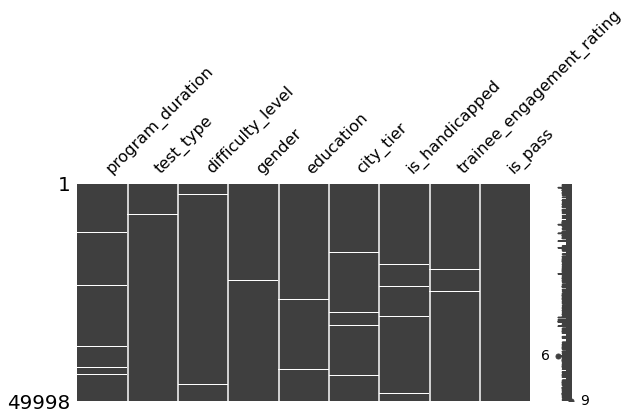

In [144]:
msno.matrix(raw_data, figsize=(9, 4))

In [145]:
raw_data.dropna(axis=0, how='any', inplace=True)

In [146]:
raw_data['is_pass'].value_counts()

1    30995
0    13599
Name: is_pass, dtype: int64

In [147]:
raw_data

,program_duration,test_type,difficulty_level,gender,education,city_tier,is_handicapped,trainee_engagement_rating,is_pass
0,136.0,offline,intermediate,M,Matriculation,3.0,N,1.0,0
1,131.0,offline,easy,F,High School Diploma,4.0,N,3.0,1
2,120.0,online,easy,M,Matriculation,1.0,N,2.0,1
3,117.0,offline,easy,F,Matriculation,3.0,N,1.0,1
4,131.0,offline,intermediate,F,High School Diploma,1.0,N,4.0,1
...,...,...,...,...,...,...,...,...,...
49991,134.0,online,easy,M,Bachelors,4.0,N,1.0,0
49992,120.0,online,easy,F,Matriculation,4.0,N,1.0,1
49993,121.0,offline,hard,F,High School Diploma,2.0,N,4.0,1
49995,117.0,online,easy,F,High School Diploma,2.0,N,1.0,1


# 查看需编码列的唯一值

In [148]:
raw_data['test_type'].unique()
raw_data['difficulty_level'].unique()
raw_data['gender'].unique()
raw_data['education'].unique()
raw_data['is_handicapped'].unique()

array(['offline', 'online'], dtype=object)

array(['intermediate', 'easy', 'hard', 'vary hard'], dtype=object)

array(['M', 'F'], dtype=object)

array(['Matriculation', 'High School Diploma', 'Bachelors', 'Masters',
       'No Qualification'], dtype=object)

array(['N', 'Y'], dtype=object)

# 独热

In [149]:
# raw_data = raw_data.join(pd.get_dummies(raw_data[["gender"]]))

# 去除独热后的列

In [150]:
# raw_data.drop(['gender'], inplace=True, axis=1)

# 构造特征编码映射表

In [151]:
test_type_map = {'online': 0, 'offline': 1}
difficulty_level_map = {'easy': 1, 'intermediate': 2, 'hard': 3, 'vary hard': 4}
education_map = {'No Qualification': 1, 'High School Diploma': 2, 'Matriculation': 3, 'Bachelors': 4, 'Masters': 5}
is_handicapped_map = {'N': 0, 'Y': 1}
gender_map = {'M': 0, 'F': 1}

# 特征编码

In [152]:
raw_data['test_type'] = raw_data['test_type'].map(test_type_map)
raw_data['difficulty_level'] = raw_data['difficulty_level'].map(difficulty_level_map)
raw_data['education'] = raw_data['education'].map(education_map)
raw_data['is_handicapped'] = raw_data['is_handicapped'].map(is_handicapped_map)
raw_data['gender'] = raw_data['gender'].map(gender_map)

In [153]:
encoded_data = copy.deepcopy(raw_data)

In [154]:
encoded_data

,program_duration,test_type,difficulty_level,gender,education,city_tier,is_handicapped,trainee_engagement_rating,is_pass
0,136.0,1,2,0,3,3.0,0,1.0,0
1,131.0,1,1,1,2,4.0,0,3.0,1
2,120.0,0,1,0,3,1.0,0,2.0,1
3,117.0,1,1,1,3,3.0,0,1.0,1
4,131.0,1,2,1,2,1.0,0,4.0,1
...,...,...,...,...,...,...,...,...,...
49991,134.0,0,1,0,4,4.0,0,1.0,0
49992,120.0,0,1,1,3,4.0,0,1.0,1
49993,121.0,1,3,1,2,2.0,0,4.0,1
49995,117.0,0,1,1,2,2.0,0,1.0,1


In [155]:
encoded_data.to_csv('data/after_EDA/EDA_data.csv', index=None)